In [1]:
#Name: Karan Rakesh Singh
#Email_Id: singh.kara@northeastern.edu

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pylab
from scipy import stats
from sklearn.metrics import confusion_matrix, cohen_kappa_score, roc_curve, roc_auc_score, accuracy_score

# Task A
1. Reading the CSV into a DataFrame.
2. Changing the type of the 'date' columns from object to datetime.
3. Grouping with required aggregations.
4. Sorting and displaying to complete Task A.

In [76]:
df = pd.read_csv('./screening_exercise_orders_v201810.csv')
df['date']= pd.to_datetime(df['date'])
new_df = df.groupby(['customer_id','gender']).agg(most_recent_order_date=('date', 'max'), order_count=('customer_id', 'count')).reset_index()
sorted_df = new_df.sort_values('customer_id')
sorted_df.head(10)

,customer_id,gender,most_recent_order_date,order_count
0,1000,0,2017-01-01 00:11:31,1
1,1001,0,2017-01-01 00:29:56,1
2,1002,1,2017-02-19 21:35:31,3
3,1003,1,2017-04-26 02:37:20,4
4,1004,0,2017-01-01 03:11:54,1
5,1005,1,2017-12-16 01:39:27,2
6,1006,1,2017-05-09 15:27:20,3
7,1007,0,2017-01-01 15:59:50,1
8,1008,0,2017-12-17 05:47:48,3
9,1009,1,2017-01-01 19:27:17,1


# Task B
## NOTE
1. Monday is the first day of the week and all days in a new year preceding the first Monday are considered to be in week 0.
2. There are 53 weeks because 2017 was a leap year.

## IMPLEMENTATION
1. Adding a new column to transform date into Year-Week_Number.
2. Grouping along with aggregation as needed.
3. Plotting a bar graph for count of orders per week for the store and thus completing Task B 

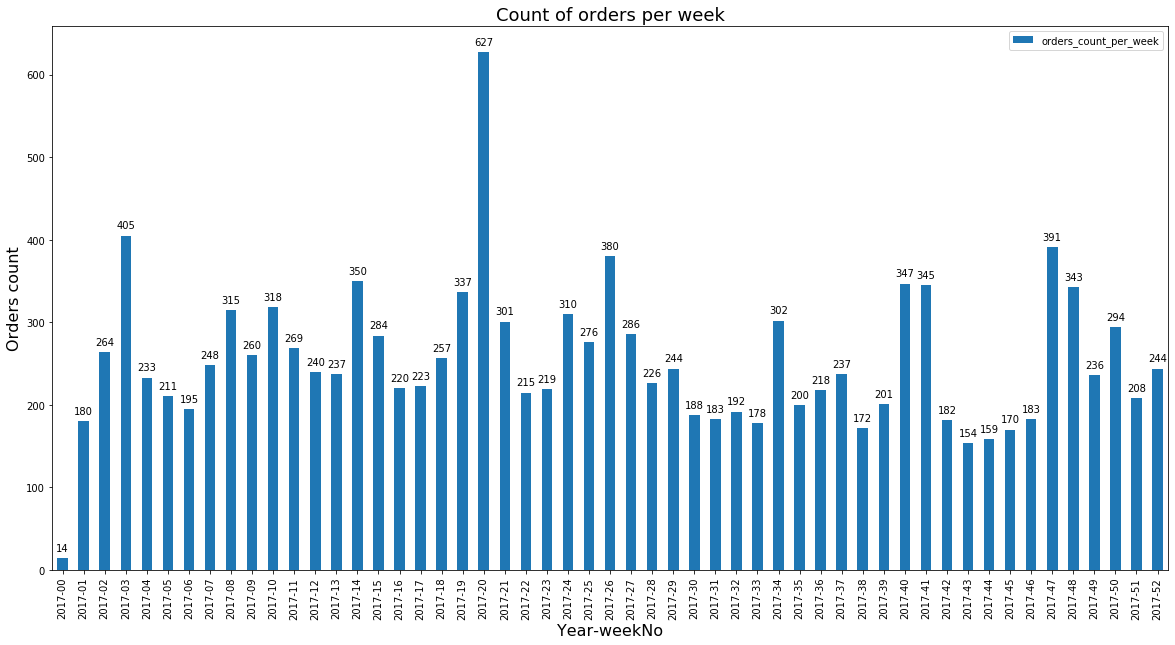

In [77]:
%matplotlib inline
pylab.rcParams['figure.figsize'] = (20, 10)

df['year_weekNo'] = df.date.dt.strftime('%Y-%W')
orders_per_week_df = df.groupby(['year_weekNo']).agg(orders_count_per_week = ('customer_id', 'count')).reset_index()


lx = orders_per_week_df.plot(kind='bar',x='year_weekNo',y='orders_count_per_week')

for p in lx.patches: lx.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.title('Count of orders per week',fontsize=18)

plt.ylabel('Orders count',fontsize=16)
plt.xlabel('Year-weekNo',fontsize=16)
plt.show()

# Task C

## ANALYSIS

Before moving onto computing the mean order value for gender 0 and for gender 1 and checking if the difference is significant. I decided to check the distribution of the orders for both the genders. I used a histogram plot to visualise the distribution (The plots can be seen by running the next cell). It is evident from the the plot that the order values are not normally distributed and thus we cannot use tests which assumes the data to be normally distributed. I then decided to take the log of the order values by adding one in order to avoid NaN values when the value of the order is 0. Followed by this, I used a histogram plot again to visualise the distribution of the log values of the orders and it is evident from the plot below that we can assume the log order values to be normally distributed. Under the assumption that the log order values are normally distributed, I checked the variance for both the group of genders and the variance wasn't equal.

## ANALYSIS CONCLUSION

We can assume the log order values to be normally distributed with unequal variance for the group of genders and thus it is evidence enough to perform a welch's t-test in order to check the difference between means of log order values for both the group of genders.

## Welch's t test

Null Hypothesis: The difference between mean order values for gender 0 and gender 1 is statistically not significant.

Alternate Hypothesis: The difference between mean order values for gender 0 and gender 1 is statistically significant.

This test works under the assumption that two sample distributions are normally distributed, independent with unequal variance and thus it is perfect for comparing the means of the order values for two groups. I have used the scipy library to compute the t-statistic and p value for welch's t-test and I am using a critical value of 0.05 to compare with the two tail p-value. I set the equal_var value to False for the library to use welch's t-test instead of the regular two tail tests which assumes equal variance. I am aware of the internal working of the welch's t-test and can elaborate on it while explaining it just to keep the submission concise and to the point of completing the tasks.

## Result

Comparing the p-value with the critical value, I reached a conslusion that the difference between the mean order value for gender 0 and gender 1 is statistically not significant as I found weak evidence against the Null Hypothesis.

Mean, Variance and Standard deviation on log order values:

   gender  mean_value  variance_value  std_value
0       0    5.422276        1.332747   1.154447
1       1    5.413693        1.247084   1.116729


After comparing the two tail p value with the critical value of 0.05 we got a p value of 0.661 which is greater than 0.05 and is NOT statistically significant. It indicates weak evidence against the null hypothesis. This means we fail to reject the null hypothesis and cannot accept the alternative hypothesis. NOTE: We cannot accept the null hypothesis, but only find evidence against it.


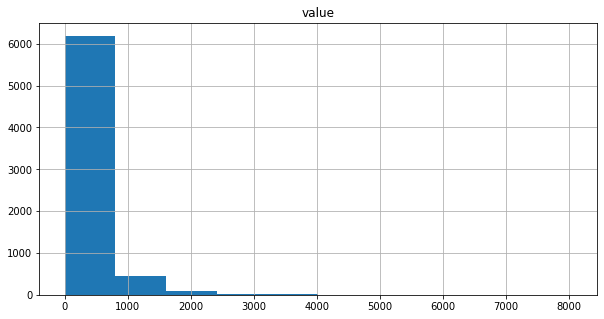

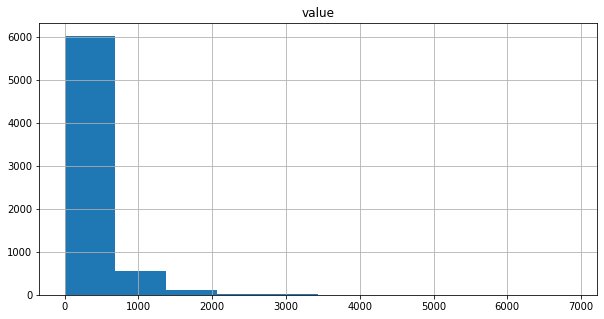

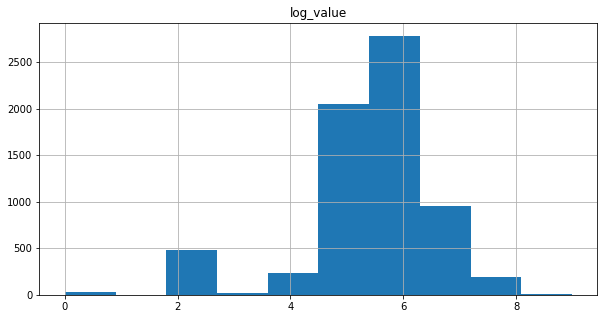

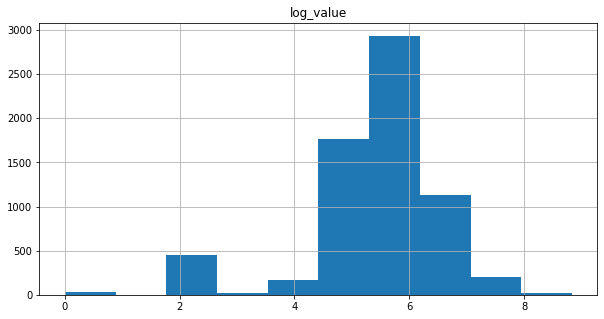

In [79]:
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10, 5)
df.groupby('gender', sort= True).hist('value')
df['log_value'] = np.log(df.value + 1)
df.groupby('gender', sort= True).hist('log_value')
agg_df = df.groupby('gender', sort= True).agg(mean_value = ('log_value', 'mean'), variance_value = ('log_value', 'var'), std_value = ('log_value', 'std')).reset_index()
mean_gender_0 = agg_df['mean_value'][0]
variance_gender_0 = agg_df['variance_value'][0]
std_gender_0 = agg_df['std_value'][0]

mean_gender_1 = agg_df['mean_value'][1]
variance_gender_1 = agg_df['variance_value'][1]
std_gender_1 = agg_df['std_value'][1]

log_order_value_0 = df.loc[df['gender'] == 0]['log_value'].to_numpy()
log_order_value_1 = df.loc[df['gender'] == 1]['log_value'].to_numpy()

p_two_tail = stats.ttest_ind(log_order_value_0,log_order_value_1, equal_var = False).pvalue

p_two_tail = round(p_two_tail,4)
print('Mean, Variance and Standard deviation on log order values:\n')
print(agg_df)
print('\n')

if ( p_two_tail <= 0.05 ):
    print("After comparing the two tail p value with the critical value of 0.05 we got a p value of "+str(p_two_tail)+" which is less than 0.05 and is statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random or by chance). Therefore, we reject the null hypothesis, and accept the alternative hypothesis that the mean order values of gender 0 and gender 1 are statistically different." )
else:
    print("After comparing the two tail p value with the critical value of 0.05 we got a p value of "+str(p_two_tail)+" which is greater than 0.05 and is NOT statistically significant. It indicates weak evidence against the null hypothesis. This means we fail to reject the null hypothesis and cannot accept the alternative hypothesis. NOTE: We cannot accept the null hypothesis, but only find evidence against it.")

# Task D

Working under the assumption that a pre-trained model was used to make predictions on the test data set and the results of which are provided in the form of 'screening_exercise_orders_v201810.csv' file.

## Performance Analysis using Confusion Matrix

1. We can see that the model's accuracy is 64.68% and the null error rate is 50% which means that the model has learned atleast something from the training dataset and is better than a dumb model which predicts the majority class for all the data points. We can also see in the metrics below that the test dataset is a balanced one with equal number of gender 1 and gender 0 datapoints.

2. Looking at the count of the False Positive (Type-I) error and the False negatives (Type-II) error we can see that the model is more prone to making Type-I errors that is it is predicting the gender 1 when the gender is 0 more often than it is predicting gender 0 when the gender is 1. By looking at this we can claim that the model has learned the distribution of gender 1 better than gender 0.

3. The claim we made above can be supported by 2 more metrics. If we look at the count of True positive which says that the model correctly predicted gender 1 when the actual gender was 1, the count is more than the count of True negatives  which says that the model correctly predicted gender 0 when the actual gender was 0. This observation supports our claim that the model has learned the distribution of gender 1 better than that of gender 0. Additionally, if we look at the True positive rate/sensitivity of the model, we see that the value is 79.7% which is much greater than the True negative rate/specificity of the model whose value is 49.7%. Looking at this metric we can confidently say that there is strong evidence for the claim made above that the model has learned the distribution of gender 1 better than the distribution of gender 0.

4. The False positive rate of our model is 50.33% which is quite high and tells us that almost 50% of the times our model predicts the gender 1 when the actual gender is 0.

5. The precision of the model is 61.29% which tells us that how often is the model correct when it predicts the gender 1. The value is pretty low and we can say that the model has not learned the overall data distribution well. 

6. The value of area under the ROC curve is not much different than the accuracy because our test dataset is balanced and thus both of them can be considered to be a good metric for evaluation.

7. The F1 score is nothing but the harmonic mean of the precision and recall with equal weight to both in this case.

## Final Comments

Looking at the overall performance of the model by analysing the confusion matrix, we can say that the model performs poorly on the test set especially for gender 0. Some of the reasons that I suspect behind the model's poor performance are as follows:

1. I suspect that the distribution from which the testing dataset has been taken is different from the training dataset distribution and to fix this problem, we can take an additional validation dataset coming from the same distribution as the testing dataset and we can perform validation using this validation dataset to adjust the threshold of the model which will also help us to combat class imbalance as stated in the point below.

2. I also suspect that the class wise distribution in the training had an imbalance with less representation from gender 0 and more from gender 1 causing the model to be biased towards gender 1. 

There are many other comments that can be made and fixed if I have access to the model and the training dataset.

True Negatives: 2189 
False Positives/Type-I error: 2218 
False Negatives/Type-II error:  895 
True Positives:  3512
Frequency of gender 0:  4407
Frequency of gender 1:  4407
Null Error Rate: 50.0 %
Accuracy: 64.68 %
Classification Error: 35.32 %
Recall/Sensitivity: 79.7 %
Specificity: 49.7 %
False Positive Rate: 50.33 %
Precision: 61.29 %
Prevalence: 50.0 %
Cohen Kappa Score: 0.5
F1-Score: 0.6929
Area under the ROC curve: 0.6468


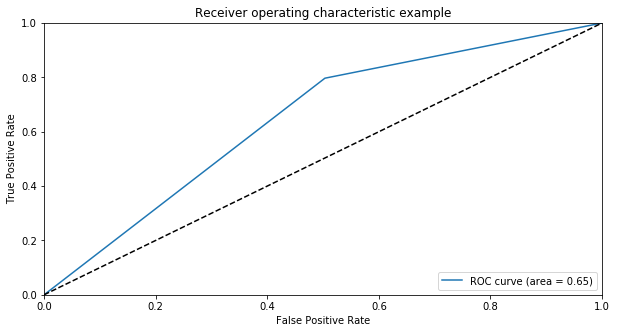

In [81]:
predictions_df = df.groupby(['customer_id','gender','predicted_gender']).agg(order_count = ('customer_id', 'count')).reset_index()
original_gender = predictions_df['gender'].to_numpy()
predicted_gender = predictions_df['predicted_gender'].to_numpy() 
TN, FP, FN, TP=confusion_matrix(original_gender, predicted_gender).ravel()

print('True Negatives:',TN,'\nFalse Positives/Type-I error:', FP, '\nFalse Negatives/Type-II error: ', FN,'\nTrue Positives: ', TP)
total = TP+TN+FP+FN

(unique, counts) = np.unique(original_gender, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print('Frequency of gender 0: ', frequencies[0][1])
print('Frequency of gender 1: ', frequencies[1][1])

null_error_rate = (TN+FP)/ float(total)
print('Null Error Rate:',round(null_error_rate, 4)*100 , '%')

accuracy = (TP+TN)/float(total)
print('Accuracy:', round(accuracy, 4)*100 , '%')



classification_error = (FP + FN) / float(total)
print('Classification Error:', round(classification_error, 4)*100 , '%')

sensitivity = TP / float(FN + TP)
print('Recall/Sensitivity:',round(sensitivity, 3)*100 , '%')

specificity = TN / float(TN + FP)
print('Specificity:',round(specificity, 3)*100 , '%')

false_positive_rate = FP / float(TN + FP)
print('False Positive Rate:',round(false_positive_rate, 4)*100 , '%')

precision = TP / float(TP + FP)
print('Precision:',round(precision, 4)*100 , '%')

prevalence = (FN+TP) / float(total)
print('Prevalence:',round(prevalence, 4)*100 , '%')

kappa_score = cohen_kappa_score(original_gender, predicted_gender)
print('Cohen Kappa Score:',round(prevalence, 4))

f1_score = 2*(precision*tp_rate)/(precision + tp_rate)
print('F1-Score:',round(f1_score, 4))

fpr, tpr, thresholds =roc_curve(original_gender, predicted_gender, pos_label=1)
area =roc_auc_score(original_gender, predicted_gender)
print('Area under the ROC curve:',round(area, 4))

# Plot ROC curve
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Task E

My most favourite tool is Google Colaboratory without a doubt. The tool has almost stirred a revolution for a student's life in ML/AI/DS and has completely changed the dynamics of the domain for a student. The easy GPU access along with a super easy interface and easy ways of integration with Jupyter Notebook and Github has made my life so much more easier. It has helped me solve a lot of problems to a very great extent. Recently, I was working with building Generative Adversarial Networks and trying to replicate the research paper Generative Adversarial Nets by Goodfellow et.al as a part of my project and I realised that I had exhausted all my student AWS credits leaving me with no GPU access. I was already running out of time and I did not want to try and set up GCP as it would have taken some time to do it or spend money for GPU access. Google Colab came to my rescue once again and all I had to do was create a new file, change my runtime to GPU and start training my GAN within seconds and without spending much time on setup. For obvious reasons it was slower than using AWS because it was free but I guess it was a very good, suitable as well as an efficient tradeoff during such difficult times. This tool has enabled and provided an excellent platform to many students like me who are passionate about ML/AI/DS and now can play around with it without spending any additional money, time or energy.